In [553]:
!pip install opendatasets --upgrade --quiet

In [554]:
import opendatasets as od

In [555]:
od.version()

'0.1.22'

In [556]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [557]:
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [558]:
import os

In [559]:
data_dir = './weather-dataset-rattle-package'

In [560]:
os.listdir(data_dir)

['weatherAUS.csv']

In [561]:
train_csv = data_dir + '/weatherAUS.csv'

In [562]:
!pip install pandas --quiet
import pandas as pd

In [563]:
raw_df = pd.read_csv(train_csv)

In [564]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [565]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [566]:
raw_df.dropna(subset=["RainToday","RainTomorrow"],inplace=True)

In [567]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [568]:
px.histogram(raw_df,x="Location",color="RainToday")

In [569]:
px.histogram(raw_df,x="RainToday", color="RainTomorrow",opacity=0.75)

In [570]:
px.histogram(raw_df,x="Temp3pm", color="RainTomorrow")

In [571]:
px.scatter(raw_df.sample(2000),
            x='MinTemp',
           y='MaxTemp',
           color='RainToday')

In [572]:
px.scatter(raw_df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

hence if temp is low and humidity is high at 3pm then there is more chance of rain

In [573]:
use_sample=True
if use_sample:
  raw_df=raw_df.sample(frac=0.1).copy()

In [574]:
raw_df

Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
86493   2015-07-20    Brisbane     11.7     20.9       0.0          2.8   
8761    2016-09-02       Cobar     13.0     16.0      22.0          NaN   
166     2009-05-16      Albury     12.4     16.4       1.8          NaN   
91956   2013-11-10   GoldCoast     20.8     28.0       0.0          NaN   
91910   2013-09-25   GoldCoast     18.3     28.3       0.0          NaN   
...            ...         ...      ...      ...       ...          ...   
124585  2011-02-02  SalmonGums     11.3     32.0       0.0          NaN   
142581  2013-12-03   Katherine     24.1     35.0       7.0          2.8   
125139  2012-09-08  SalmonGums      1.3     20.6       0.0          NaN   
18299   2009-07-04   NorahHead      7.7     17.0       0.0          NaN   
69370   2014-09-07   Melbourne      6.6     21.2       0.0          3.4   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
86493        7.3           E           35.0        WSW        ESE   
8761         NaN           N           52.0         SE         NE   
166          NaN           W           52.0          W        WSW   
91956        NaN         ENE           48.0          N        ENE   
91910        NaN         NNW           30.0         NE         NE   
...          ...         ...            ...        ...        ...   
124585       NaN         SSE           50.0          E        ESE   
142581       NaN         ENE           50.0          E        WSW   
125139       NaN         ENE           33.0        NNE        NNE   
18299        NaN           W           26.0        WNW        WSW   
69370       11.1           N           48.0          N          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
86493            6.0          13.0         74.0         53.0       1030.4   
8761            13.0          22.0         97.0         97.0       1004.4   
166             22.0          24.0         82.0         54.0       1011.8   
91956           15.0           9.0         57.0         81.0       1012.5   
91910            7.0           9.0         58.0         57.0       1012.3   
...              ...           ...          ...          ...          ...   
124585          11.0          24.0         57.0         28.0          NaN   
142581           7.0           7.0         84.0         86.0       1010.9   
125139          19.0          13.0         71.0         37.0          NaN   
18299           13.0          15.0         57.0         40.0       1012.2   
69370           22.0          26.0         65.0         34.0       1029.8   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
86493        1027.8       7.0       1.0     14.4     19.7        No   
8761          995.8       8.0       8.0     13.7     16.3       Yes   
166          1013.4       8.0       8.0     13.0     14.5       Yes   
91956        1011.4       NaN       NaN     26.3     23.0        No   
91910        1010.7       NaN       NaN     26.0     26.3        No   
...             ...       ...       ...      ...      ...       ...   
124585          NaN       NaN       NaN     22.0     30.7        No   
142581       1006.5       8.0       3.0     27.0     34.0       Yes   
125139          NaN       NaN       NaN     11.6     19.7        No   
18299        1010.9       NaN       NaN     12.0     16.1        No   
69370        1025.1       NaN       NaN     11.5     20.7        No   

       RainTomorrow  
86493            No  
8761            Yes  
166              No  
91956           Yes  
91910            No  
...             ...  
124585           No  
142581           No  
125139           No  
18299            No  
69370            No  

[14079 rows x 23 columns]

In [575]:
#now lets split into train, validation and test set
from sklearn.model_selection import train_test_split
a,test_df=train_test_split(raw_df,test_size=0.2,random_state=42)

train_df,validation_df=train_test_split(a,test_size=0.25,random_state=42)

In [576]:
len(train_df),len(validation_df),len(test_df)

(8447, 2816, 2816)

<Axes: title={'center': 'number of rows per year'}, xlabel='Date', ylabel='count'>

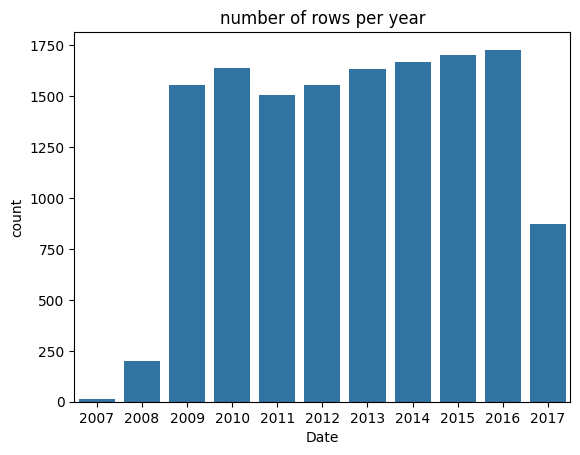

In [577]:
plt.title('number of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

since out main goal is to predict the future data, lets set the train data up to 2015, the data of 2015 for validation and 16,17 for test


In [578]:
year=pd.to_datetime(raw_df.Date).dt.year

train_df=raw_df[year<2015]
validation_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [579]:
train_df.shape,validation_df.shape,test_df.shape

((9774, 23), (1705, 23), (2600, 23))

In [580]:
train_df

Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
166     2009-05-16      Albury     12.4     16.4       1.8          NaN   
91956   2013-11-10   GoldCoast     20.8     28.0       0.0          NaN   
91910   2013-09-25   GoldCoast     18.3     28.3       0.0          NaN   
69386   2014-09-23   Melbourne     10.2     25.8       0.0          6.0   
88887   2013-10-12      Cairns     17.0     30.4       0.0          9.8   
...            ...         ...      ...      ...       ...          ...   
124585  2011-02-02  SalmonGums     11.3     32.0       0.0          NaN   
142581  2013-12-03   Katherine     24.1     35.0       7.0          2.8   
125139  2012-09-08  SalmonGums      1.3     20.6       0.0          NaN   
18299   2009-07-04   NorahHead      7.7     17.0       0.0          NaN   
69370   2014-09-07   Melbourne      6.6     21.2       0.0          3.4   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
166          NaN           W           52.0          W        WSW   
91956        NaN         ENE           48.0          N        ENE   
91910        NaN         NNW           30.0         NE         NE   
69386       11.2           N           39.0        NNE          N   
88887       11.1           E           39.0        SSE          E   
...          ...         ...            ...        ...        ...   
124585       NaN         SSE           50.0          E        ESE   
142581       NaN         ENE           50.0          E        WSW   
125139       NaN         ENE           33.0        NNE        NNE   
18299        NaN           W           26.0        WNW        WSW   
69370       11.1           N           48.0          N          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
166             22.0          24.0         82.0         54.0       1011.8   
91956           15.0           9.0         57.0         81.0       1012.5   
91910            7.0           9.0         58.0         57.0       1012.3   
69386           28.0          24.0         45.0         26.0       1027.1   
88887           15.0          24.0         48.0         40.0       1015.1   
...              ...           ...          ...          ...          ...   
124585          11.0          24.0         57.0         28.0          NaN   
142581           7.0           7.0         84.0         86.0       1010.9   
125139          19.0          13.0         71.0         37.0          NaN   
18299           13.0          15.0         57.0         40.0       1012.2   
69370           22.0          26.0         65.0         34.0       1029.8   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
166          1013.4       8.0       8.0     13.0     14.5       Yes   
91956        1011.4       NaN       NaN     26.3     23.0        No   
91910        1010.7       NaN       NaN     26.0     26.3        No   
69386        1022.2       2.0       NaN     17.1     25.2        No   
88887        1012.0       2.0       2.0     26.6     29.1        No   
...             ...       ...       ...      ...      ...       ...   
124585          NaN       NaN       NaN     22.0     30.7        No   
142581       1006.5       8.0       3.0     27.0     34.0       Yes   
125139          NaN       NaN       NaN     11.6     19.7        No   
18299        1010.9       NaN       NaN     12.0     16.1        No   
69370        1025.1       NaN       NaN     11.5     20.7        No   

       RainTomorrow  
166              No  
91956           Yes  
91910            No  
69386            No  
88887            No  
...             ...  
124585           No  
142581           No  
125139           No  
18299            No  
69370            No  

[9774 rows x 23 columns]

In [581]:
validation_df

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
86493   2015-07-20     Brisbane     11.7     20.9       0.0          2.8   
14193   2015-01-25        Moree     22.8     38.5       2.0         20.6   
2148    2015-01-16       Albury     11.4     28.4       0.0          NaN   
57252   2015-01-18     Ballarat     10.2     19.0       0.2          NaN   
113843  2015-05-11  Witchcliffe     11.3     19.8       0.2          NaN   
...            ...          ...      ...      ...       ...          ...   
95705   2015-10-20   Townsville     21.2     29.1       3.0          9.6   
132374  2015-09-08       Hobart      7.7     14.8       0.4          1.0   
77271   2015-07-09     Portland      6.4     15.1       0.2          1.2   
38741   2015-04-21   WaggaWagga      6.7     20.3       0.0          3.8   
104932  2015-10-05    Nuriootpa      8.9     33.6       0.0          3.2   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
86493        7.3           E           35.0        WSW        ESE   
14193       13.3         WSW           48.0        NNE         SW   
2148         NaN          NW           41.0          W          W   
57252        NaN         SSW           39.0        SSW          S   
113843       NaN         SSE           37.0          E        SSE   
...          ...         ...            ...        ...        ...   
95705       10.4         ENE           46.0        ESE        ENE   
132374       4.4         SSW           39.0        NNW         SW   
77271        3.0           N           31.0          N        NNE   
38741        5.6           S           37.0          S         SE   
104932      11.1         NNW           52.0         NE        NNW   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
86493            6.0          13.0         74.0         53.0       1030.4   
14193           15.0          19.0         60.0         25.0       1005.7   
2148             7.0          20.0         63.0         31.0       1010.2   
57252           20.0          22.0         73.0         49.0       1015.6   
113843          11.0          20.0         83.0         68.0       1030.4   
...              ...           ...          ...          ...          ...   
95705           28.0          31.0         56.0         60.0       1020.0   
132374           9.0          22.0         92.0         50.0       1012.9   
77271            9.0          19.0         89.0         63.0       1024.2   
38741           13.0          19.0         57.0         27.0       1026.6   
104932           9.0          26.0         27.0          8.0       1021.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
86493        1027.8       7.0       1.0     14.4     19.7        No   
14193        1002.3       1.0       6.0     28.4     36.9       Yes   
2148         1007.4       NaN       NaN     17.7     26.7        No   
57252        1015.7       8.0       6.0     12.5     16.8        No   
113843       1028.1       NaN       NaN     15.2     18.4        No   
...             ...       ...       ...      ...      ...       ...   
95705        1016.6       2.0       5.0     25.9     26.3       Yes   
132374       1013.9       7.0       3.0      9.5     14.5        No   
77271        1019.7       8.0       6.0      9.6     14.3        No   
38741        1023.1       4.0       6.0     12.5     19.3        No   
104932       1016.8       3.0       NaN     22.1     32.9        No   

       RainTomorrow  
86493            No  
14193            No  
2148             No  
57252            No  
113843           No  
...             ...  
95705            No  
132374          Yes  
77271            No  
38741            No  
104932           No  

[1705 rows x 23 columns]

In [582]:
test_df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
8761    2016-09-02          Cobar     13.0     16.0      22.0          NaN   
55096   2017-06-20    MountGinini      3.7      9.2       0.0          NaN   
114322  2016-09-01    Witchcliffe      8.2     14.5       2.8          NaN   
51677   2016-06-06    Tuggeranong      9.0     14.6      81.8          NaN   
51941   2017-02-25    Tuggeranong     15.7     21.2       0.0          NaN   
...            ...            ...      ...      ...       ...          ...   
83794   2016-11-25       Dartmoor      8.6     16.6       0.2          NaN   
11945   2017-02-24   CoffsHarbour     16.6     27.2       0.0          NaN   
23644   2016-02-28  NorfolkIsland     22.3     26.1       1.8          3.6   
96066   2016-10-15     Townsville     21.5     28.9       0.0         11.2   
126507  2016-08-05     SalmonGums      8.4     13.8       8.6          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
8761         NaN           N           52.0         SE         NE   
55096        NaN         SSW           41.0        WSW        WSW   
114322       NaN         SSW           20.0          S         SW   
51677        NaN           W           35.0         NW        WNW   
51941        NaN         ESE           33.0          S         SE   
...          ...         ...            ...        ...        ...   
83794        NaN         SSW           35.0         SW         SW   
11945        NaN          SE           22.0         SW        ESE   
23644        9.1          NE           50.0         NE         NE   
96066        NaN         ESE           50.0        ESE        ENE   
126507       NaN           E           19.0          E         SE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
8761            13.0          22.0         97.0         97.0       1004.4   
55096           11.0          15.0         24.0         53.0          NaN   
114322          11.0           9.0         64.0         63.0       1026.3   
51677           11.0          17.0         82.0         52.0       1001.1   
51941           11.0          15.0         68.0         58.0       1020.6   
...              ...           ...          ...          ...          ...   
83794           20.0          24.0         65.0         63.0       1021.0   
11945            7.0          15.0         72.0         61.0       1020.1   
23644           28.0          28.0         81.0         80.0       1016.6   
96066           26.0          30.0         60.0         54.0       1017.5   
126507          11.0           6.0         93.0         80.0          NaN   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
8761          995.8       8.0       8.0     13.7     16.3       Yes   
55096           NaN       NaN       NaN      6.5      7.9        No   
114322       1024.5       NaN       NaN     11.9     13.3       Yes   
51677        1001.5       NaN       NaN     10.0     13.5       Yes   
51941        1019.3       NaN       NaN     15.7     19.3        No   
...             ...       ...       ...      ...      ...       ...   
83794        1022.3       NaN       NaN     12.9     15.2        No   
11945        1018.0       6.0       NaN     23.3     26.3        No   
23644        1014.7       3.0       7.0     24.8     25.1       Yes   
96066        1014.6       8.0       7.0     24.8     26.9        No   
126507          NaN       NaN       NaN     10.1     13.3       Yes   

       RainTomorrow  
8761            Yes  
55096            No  
114322           No  
51677            No  
51941            No  
...             ...  
83794            No  
11945            No  
23644            No  
96066            No  
126507           No  

[2600 rows x 23 columns]

identifying input and target columns

In [583]:
train_input=train_df.drop(columns=["Date","RainTomorrow"])
train_target=train_df["RainTomorrow"]
train_input

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
166         Albury     12.4     16.4       1.8          NaN       NaN   
91956    GoldCoast     20.8     28.0       0.0          NaN       NaN   
91910    GoldCoast     18.3     28.3       0.0          NaN       NaN   
69386    Melbourne     10.2     25.8       0.0          6.0      11.2   
88887       Cairns     17.0     30.4       0.0          9.8      11.1   
...            ...      ...      ...       ...          ...       ...   
124585  SalmonGums     11.3     32.0       0.0          NaN       NaN   
142581   Katherine     24.1     35.0       7.0          2.8       NaN   
125139  SalmonGums      1.3     20.6       0.0          NaN       NaN   
18299    NorahHead      7.7     17.0       0.0          NaN       NaN   
69370    Melbourne      6.6     21.2       0.0          3.4      11.1   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
166              W           52.0          W        WSW          22.0   
91956          ENE           48.0          N        ENE          15.0   
91910          NNW           30.0         NE         NE           7.0   
69386            N           39.0        NNE          N          28.0   
88887            E           39.0        SSE          E          15.0   
...            ...            ...        ...        ...           ...   
124585         SSE           50.0          E        ESE          11.0   
142581         ENE           50.0          E        WSW           7.0   
125139         ENE           33.0        NNE        NNE          19.0   
18299            W           26.0        WNW        WSW          13.0   
69370            N           48.0          N          N          22.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
166             24.0         82.0         54.0       1011.8       1013.4   
91956            9.0         57.0         81.0       1012.5       1011.4   
91910            9.0         58.0         57.0       1012.3       1010.7   
69386           24.0         45.0         26.0       1027.1       1022.2   
88887           24.0         48.0         40.0       1015.1       1012.0   
...              ...          ...          ...          ...          ...   
124585          24.0         57.0         28.0          NaN          NaN   
142581           7.0         84.0         86.0       1010.9       1006.5   
125139          13.0         71.0         37.0          NaN          NaN   
18299           15.0         57.0         40.0       1012.2       1010.9   
69370           26.0         65.0         34.0       1029.8       1025.1   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  
166          8.0       8.0     13.0     14.5       Yes  
91956        NaN       NaN     26.3     23.0        No  
91910        NaN       NaN     26.0     26.3        No  
69386        2.0       NaN     17.1     25.2        No  
88887        2.0       2.0     26.6     29.1        No  
...          ...       ...      ...      ...       ...  
124585       NaN       NaN     22.0     30.7        No  
142581       8.0       3.0     27.0     34.0       Yes  
125139       NaN       NaN     11.6     19.7        No  
18299        NaN       NaN     12.0     16.1        No  
69370        NaN       NaN     11.5     20.7        No  

[9774 rows x 21 columns]

In [584]:
train_target

166        No
91956     Yes
91910      No
69386      No
88887      No
         ... 
124585     No
142581     No
125139     No
18299      No
69370      No
Name: RainTomorrow, Length: 9774, dtype: object

In [585]:
#now lets repeat it for validation and test
validation_input=validation_df.drop(columns="RainTomorrow")
validation_target=validation_df["RainTomorrow"]

In [586]:
test_input=test_df.drop(columns="RainTomorrow")
test_target=test_df["RainTomorrow"]

In [587]:
train_input.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9751.000000  9759.000000  9774.000000  6214.000000  5869.000000   
mean     12.047513    23.037924     2.339298     5.285694     7.578344   
std       6.284152     6.943881     7.841325     4.099627     3.784350   
min      -7.600000    -2.400000     0.000000     0.000000     0.000000   
25%       7.600000    17.900000     0.000000     2.600000     4.800000   
50%      11.800000    22.400000     0.000000     4.400000     8.300000   
75%      16.500000    27.900000     0.800000     7.000000    10.600000   
max      30.300000    46.400000   174.600000    68.800000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9100.000000   9696.000000   9690.000000  9670.000000  9658.000000   
mean       40.393956     14.139748     18.868524    68.705274    51.309277   
std        13.818468      8.985035      8.953513    18.745014    20.623107   
min         7.000000      0.000000      0.000000     2.000000     1.000000   
25%        31.000000      7.000000     13.000000    57.000000    37.000000   
50%        39.000000     13.000000     19.000000    70.000000    52.000000   
75%        48.000000     20.000000     24.000000    82.000000    65.000000   
max       117.000000     67.000000     87.000000   100.000000   100.000000   

       Pressure9am  Pressure3pm    Cloud9am     Cloud3pm      Temp9am  \
count  8878.000000  8881.000000  6319.00000  6209.000000  9719.000000   
mean   1017.476290  1015.114751     4.36050     4.472057    16.836341   
std       7.065997     7.014578     2.86332     2.671303     6.320435   
min     987.400000   984.200000     0.00000     0.000000    -5.200000   
25%    1012.800000  1010.400000     1.00000     2.000000    12.300000   
50%    1017.400000  1015.100000     5.00000     5.000000    16.500000   
75%    1022.300000  1019.900000     7.00000     7.000000    21.200000   
max    1041.000000  1038.500000     9.00000     9.000000    38.200000   

           Temp3pm  
count  9709.000000  
mean     21.567092  
std       6.781007  
min      -3.500000  
25%      16.700000  
50%      20.900000  
75%      26.100000  
max      44.900000

In [588]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9774 entries, 166 to 69370
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       9774 non-null   object 
 1   MinTemp        9751 non-null   float64
 2   MaxTemp        9759 non-null   float64
 3   Rainfall       9774 non-null   float64
 4   Evaporation    6214 non-null   float64
 5   Sunshine       5869 non-null   float64
 6   WindGustDir    9092 non-null   object 
 7   WindGustSpeed  9100 non-null   float64
 8   WindDir9am     9097 non-null   object 
 9   WindDir3pm     9619 non-null   object 
 10  WindSpeed9am   9696 non-null   float64
 11  WindSpeed3pm   9690 non-null   float64
 12  Humidity9am    9670 non-null   float64
 13  Humidity3pm    9658 non-null   float64
 14  Pressure9am    8878 non-null   float64
 15  Pressure3pm    8881 non-null   float64
 16  Cloud9am       6319 non-null   float64
 17  Cloud3pm       6209 non-null   float64
 18  Temp9am   

In [589]:
#now lets seperate the list of numeric and catrgorical columns
import numpy as np
numeric_col=train_input.select_dtypes(include=np.number).columns.tolist()

categorical_col=train_input.select_dtypes('object').columns.tolist()

In [590]:
numeric_col,categorical_col

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [591]:
train_input[numeric_col].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9751.000000  9759.000000  9774.000000  6214.000000  5869.000000   
mean     12.047513    23.037924     2.339298     5.285694     7.578344   
std       6.284152     6.943881     7.841325     4.099627     3.784350   
min      -7.600000    -2.400000     0.000000     0.000000     0.000000   
25%       7.600000    17.900000     0.000000     2.600000     4.800000   
50%      11.800000    22.400000     0.000000     4.400000     8.300000   
75%      16.500000    27.900000     0.800000     7.000000    10.600000   
max      30.300000    46.400000   174.600000    68.800000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9100.000000   9696.000000   9690.000000  9670.000000  9658.000000   
mean       40.393956     14.139748     18.868524    68.705274    51.309277   
std        13.818468      8.985035      8.953513    18.745014    20.623107   
min         7.000000      0.000000      0.000000     2.000000     1.000000   
25%        31.000000      7.000000     13.000000    57.000000    37.000000   
50%        39.000000     13.000000     19.000000    70.000000    52.000000   
75%        48.000000     20.000000     24.000000    82.000000    65.000000   
max       117.000000     67.000000     87.000000   100.000000   100.000000   

       Pressure9am  Pressure3pm    Cloud9am     Cloud3pm      Temp9am  \
count  8878.000000  8881.000000  6319.00000  6209.000000  9719.000000   
mean   1017.476290  1015.114751     4.36050     4.472057    16.836341   
std       7.065997     7.014578     2.86332     2.671303     6.320435   
min     987.400000   984.200000     0.00000     0.000000    -5.200000   
25%    1012.800000  1010.400000     1.00000     2.000000    12.300000   
50%    1017.400000  1015.100000     5.00000     5.000000    16.500000   
75%    1022.300000  1019.900000     7.00000     7.000000    21.200000   
max    1041.000000  1038.500000     9.00000     9.000000    38.200000   

           Temp3pm  
count  9709.000000  
mean     21.567092  
std       6.781007  
min      -3.500000  
25%      16.700000  
50%      20.900000  
75%      26.100000  
max      44.900000

In [592]:
train_input[categorical_col].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [593]:
#now its time to remove the null valus since if we try to train the model with null values, it will crash
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="mean")


In [594]:
raw_df.isna().sum()

Date                0
Location            0
MinTemp            38
MaxTemp            26
Rainfall            0
Evaporation      5827
Sunshine         6510
WindGustDir       907
WindGustSpeed     896
WindDir9am        942
WindDir3pm        334
WindSpeed9am      101
WindSpeed3pm      228
Humidity9am       158
Humidity3pm       355
Pressure9am      1344
Pressure3pm      1340
Cloud9am         5210
Cloud3pm         5527
Temp9am            67
Temp3pm           264
RainToday           0
RainTomorrow        0
dtype: int64

In [595]:
train_input.isna().sum()

Location            0
MinTemp            23
MaxTemp            15
Rainfall            0
Evaporation      3560
Sunshine         3905
WindGustDir       682
WindGustSpeed     674
WindDir9am        677
WindDir3pm        155
WindSpeed9am       78
WindSpeed3pm       84
Humidity9am       104
Humidity3pm       116
Pressure9am       896
Pressure3pm       893
Cloud9am         3455
Cloud3pm         3565
Temp9am            55
Temp3pm            65
RainToday           0
dtype: int64

In [596]:
train_input[numeric_col].isna().sum()

MinTemp            23
MaxTemp            15
Rainfall            0
Evaporation      3560
Sunshine         3905
WindGustSpeed     674
WindSpeed9am       78
WindSpeed3pm       84
Humidity9am       104
Humidity3pm       116
Pressure9am       896
Pressure3pm       893
Cloud9am         3455
Cloud3pm         3565
Temp9am            55
Temp3pm            65
dtype: int64

In [597]:
impute.fit(raw_df[numeric_col])

SimpleImputer()

In [598]:
train_input[numeric_col].isna().sum()

MinTemp            23
MaxTemp            15
Rainfall            0
Evaporation      3560
Sunshine         3905
WindGustSpeed     674
WindSpeed9am       78
WindSpeed3pm       84
Humidity9am       104
Humidity3pm       116
Pressure9am       896
Pressure3pm       893
Cloud9am         3455
Cloud3pm         3565
Temp9am            55
Temp3pm            65
dtype: int64

In [599]:
list(impute.statistics_)

[12.221650879566981,
 23.262598733366534,
 2.3021521414873214,
 5.454459524963645,
 7.635737878187342,
 40.0793446104832,
 14.037845185291172,
 18.663345606815394,
 68.73292148552547,
 51.29809093558729,
 1017.6822457793482,
 1015.2898657665438,
 4.442778216258879,
 4.530168381665107,
 16.998151584356265,
 21.72638436482085]

In [600]:
train_input[numeric_col]=impute.transform(train_input[numeric_col])

In [601]:
train_input[numeric_col].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [602]:
#now lets repeat this for others too
validation_input[numeric_col]=impute.transform(validation_input[numeric_col])

In [603]:
validation_input

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
86493   2015-07-20     Brisbane     11.7     20.9       0.0      2.80000   
14193   2015-01-25        Moree     22.8     38.5       2.0     20.60000   
2148    2015-01-16       Albury     11.4     28.4       0.0      5.45446   
57252   2015-01-18     Ballarat     10.2     19.0       0.2      5.45446   
113843  2015-05-11  Witchcliffe     11.3     19.8       0.2      5.45446   
...            ...          ...      ...      ...       ...          ...   
95705   2015-10-20   Townsville     21.2     29.1       3.0      9.60000   
132374  2015-09-08       Hobart      7.7     14.8       0.4      1.00000   
77271   2015-07-09     Portland      6.4     15.1       0.2      1.20000   
38741   2015-04-21   WaggaWagga      6.7     20.3       0.0      3.80000   
104932  2015-10-05    Nuriootpa      8.9     33.6       0.0      3.20000   

         Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
86493    7.300000           E           35.0        WSW        ESE   
14193   13.300000         WSW           48.0        NNE         SW   
2148     7.635738          NW           41.0          W          W   
57252    7.635738         SSW           39.0        SSW          S   
113843   7.635738         SSE           37.0          E        SSE   
...           ...         ...            ...        ...        ...   
95705   10.400000         ENE           46.0        ESE        ENE   
132374   4.400000         SSW           39.0        NNW         SW   
77271    3.000000           N           31.0          N        NNE   
38741    5.600000           S           37.0          S         SE   
104932  11.100000         NNW           52.0         NE        NNW   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
86493            6.0          13.0         74.0         53.0       1030.4   
14193           15.0          19.0         60.0         25.0       1005.7   
2148             7.0          20.0         63.0         31.0       1010.2   
57252           20.0          22.0         73.0         49.0       1015.6   
113843          11.0          20.0         83.0         68.0       1030.4   
...              ...           ...          ...          ...          ...   
95705           28.0          31.0         56.0         60.0       1020.0   
132374           9.0          22.0         92.0         50.0       1012.9   
77271            9.0          19.0         89.0         63.0       1024.2   
38741           13.0          19.0         57.0         27.0       1026.6   
104932           9.0          26.0         27.0          8.0       1021.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  
86493        1027.8  7.000000  1.000000     14.4     19.7        No  
14193        1002.3  1.000000  6.000000     28.4     36.9       Yes  
2148         1007.4  4.442778  4.530168     17.7     26.7        No  
57252        1015.7  8.000000  6.000000     12.5     16.8        No  
113843       1028.1  4.442778  4.530168     15.2     18.4        No  
...             ...       ...       ...      ...      ...       ...  
95705        1016.6  2.000000  5.000000     25.9     26.3       Yes  
132374       1013.9  7.000000  3.000000      9.5     14.5        No  
77271        1019.7  8.000000  6.000000      9.6     14.3        No  
38741        1023.1  4.000000  6.000000     12.5     19.3        No  
104932       1016.8  3.000000  4.530168     22.1     32.9        No  

[1705 rows x 22 columns]

In [604]:
test_input[numeric_col]=impute.transform(test_input[numeric_col])

In [605]:
#now its time for scaling numeric features(x-mean)/sd
raw_df[numeric_col].describe()

MinTemp       MaxTemp      Rainfall  Evaporation     Sunshine  \
count  14041.000000  14053.000000  14079.000000  8252.000000  7569.000000   
mean      12.221651     23.262599      2.302152     5.454460     7.635738   
std        6.347280      7.066377      7.959644     4.377324     3.769380   
min       -7.600000     -3.000000      0.000000     0.000000     0.000000   
25%        7.700000     18.000000      0.000000     2.600000     4.900000   
50%       12.000000     22.700000      0.000000     4.600000     8.400000   
75%       16.800000     28.300000      0.800000     7.200000    10.600000   
max       30.300000     47.000000    174.600000    74.800000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   13183.000000  13978.000000  13851.000000  13921.000000  13724.000000   
mean       40.079345     14.037845     18.663346     68.732921     51.298091   
std        13.696587      8.897044      8.891464     18.854249     20.645005   
min         7.000000      0.000000      0.000000      2.000000      1.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     65.000000   
max       120.000000     69.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm     Cloud9am     Cloud3pm       Temp9am  \
count  12735.000000  12739.000000  8869.000000  8552.000000  14012.000000   
mean    1017.682246   1015.289866     4.442778     4.530168     16.998152   
std        7.090909      7.033452     2.883159     2.699078      6.425356   
min      987.400000    982.200000     0.000000     0.000000     -5.200000   
25%     1012.900000   1010.500000     1.000000     2.000000     12.400000   
50%     1017.600000   1015.300000     5.000000     5.000000     16.700000   
75%     1022.400000   1020.000000     7.000000     7.000000     21.500000   
max     1041.000000   1038.500000     9.000000     9.000000     38.200000   

            Temp3pm  
count  13815.000000  
mean      21.726384  
std        6.877259  
min       -4.200000  
25%       16.700000  
50%       21.100000  
75%       26.400000  
max       45.000000

In [606]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [607]:
scale.fit(raw_df[numeric_col])

MinMaxScaler()

In [608]:
scale.data_min_

array([ -7.6,  -3. ,   0. ,   0. ,   0. ,   7. ,   0. ,   0. ,   2. ,
         1. , 987.4, 982.2,   0. ,   0. ,  -5.2,  -4.2])

In [609]:
scale.data_max_

array([  30.3,   47. ,  174.6,   74.8,   13.9,  120. ,   69. ,   87. ,
        100. ,  100. , 1041. , 1038.5,    9. ,    9. ,   38.2,   45. ])

In [610]:
# #now lets transform all the data
train_input[numeric_col]=scale.transform(train_input[numeric_col])

validation_input[numeric_col]=scale.transform(validation_input[numeric_col])

test_input[numeric_col]=scale.transform(test_input[numeric_col])

In [611]:
train_input[numeric_col].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9774.000000  9774.000000  9774.000000  9774.000000  9774.000000   
mean      0.518415     0.520765     0.013398     0.071486     0.546854   
std       0.165614     0.138771     0.044910     0.043713     0.210973   
min       0.000000     0.012000     0.000000     0.000000     0.000000   
25%       0.401055     0.418000     0.000000     0.048128     0.525180   
50%       0.511873     0.508000     0.000000     0.072921     0.549334   
75%       0.635884     0.618000     0.004582     0.072921     0.661871   
max       1.000000     0.988000     1.000000     0.919786     1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9774.000000   9774.000000   9774.000000  9774.000000  9774.000000   
mean        0.295330      0.204912      0.216859     0.680669     0.508173   
std         0.117997      0.129697      0.102471     0.190255     0.207074   
min         0.000000      0.000000      0.000000     0.000000     0.000000   
25%         0.212389      0.101449      0.149425     0.561224     0.363636   
50%         0.283186      0.188406      0.218391     0.683673     0.515152   
75%         0.362832      0.289855      0.275862     0.816327     0.646465   
max         0.973451      0.971014      1.000000     1.000000     1.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  9774.000000  9774.000000  9774.000000  9774.000000  9774.000000   
mean      0.561477     0.584916     0.487732     0.499250     0.507771   
std       0.125645     0.118768     0.255839     0.236581     0.145222   
min       0.000000     0.035524     0.000000     0.000000     0.000000   
25%       0.483209     0.509769     0.333333     0.333333     0.403226   
50%       0.564967     0.587742     0.493642     0.503352     0.502304   
75%       0.639925     0.658970     0.666667     0.666667     0.608295   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Temp3pm  
count  9774.000000  
mean      0.523743  
std       0.137367  
min       0.014228  
25%       0.424797  
50%       0.512195  
75%       0.615854  
max       0.997967

In [612]:
#now its time for categorical data and we are going to use one hot encoding

In [613]:
raw_df[categorical_col].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [614]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False, handle_unknown="ignore")


In [615]:
encoder.fit(raw_df[categorical_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [616]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [617]:
encoded_col=encoder.get_feature_names_out(categorical_col)

In [618]:
train_input[encoded_col]=list(encoder.transform(train_input[categorical_col]))
validation_input[encoded_col]=list(encoder.transform(validation_input[categorical_col]))
test_input[encoded_col]=list(encoder.transform(test_input[categorical_col]))

<ipython-input-618-fc4d175d1eb7>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-618-fc4d175d1eb7>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-618-fc4d175d1eb7>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-618-fc4d175d1eb7>:1: PerformanceWarning:

In [619]:
pd.set_option('display.max_columns', None)


In [620]:
train_input

Location   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
166         Albury  0.527704    0.388  0.010309     0.072921  0.549334   
91956    GoldCoast  0.749340    0.620  0.000000     0.072921  0.549334   
91910    GoldCoast  0.683377    0.626  0.000000     0.072921  0.549334   
69386    Melbourne  0.469657    0.576  0.000000     0.080214  0.805755   
88887       Cairns  0.649077    0.668  0.000000     0.131016  0.798561   
...            ...       ...      ...       ...          ...       ...   
124585  SalmonGums  0.498681    0.700  0.000000     0.072921  0.549334   
142581   Katherine  0.836412    0.760  0.040092     0.037433  0.549334   
125139  SalmonGums  0.234828    0.472  0.000000     0.072921  0.549334   
18299    NorahHead  0.403694    0.400  0.000000     0.072921  0.549334   
69370    Melbourne  0.374670    0.484  0.000000     0.045455  0.798561   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
166              W       0.398230          W        WSW      0.318841   
91956          ENE       0.362832          N        ENE      0.217391   
91910          NNW       0.203540         NE         NE      0.101449   
69386            N       0.283186        NNE          N      0.405797   
88887            E       0.283186        SSE          E      0.217391   
...            ...            ...        ...        ...           ...   
124585         SSE       0.380531          E        ESE      0.159420   
142581         ENE       0.380531          E        WSW      0.101449   
125139         ENE       0.230088        NNE        NNE      0.275362   
18299            W       0.168142        WNW        WSW      0.188406   
69370            N       0.362832          N          N      0.318841   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
166         0.275862     0.816327     0.535354     0.455224     0.554174   
91956       0.103448     0.561224     0.808081     0.468284     0.518650   
91910       0.103448     0.571429     0.565657     0.464552     0.506217   
69386       0.275862     0.438776     0.252525     0.740672     0.710480   
88887       0.275862     0.469388     0.393939     0.516791     0.529307   
...              ...          ...          ...          ...          ...   
124585      0.275862     0.561224     0.272727     0.564967     0.587742   
142581      0.080460     0.836735     0.858586     0.438433     0.431616   
125139      0.149425     0.704082     0.363636     0.564967     0.587742   
18299       0.172414     0.561224     0.393939     0.462687     0.509769   
69370       0.298851     0.642857     0.333333     0.791045     0.761989   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
166     0.888889  0.888889  0.419355  0.380081       Yes                0.0   
91956   0.493642  0.503352  0.725806  0.552846        No                0.0   
91910   0.493642  0.503352  0.718894  0.619919        No                0.0   
69386   0.222222  0.503352  0.513825  0.597561        No                0.0   
88887   0.222222  0.222222  0.732719  0.676829        No                0.0   
...          ...       ...       ...       ...       ...                ...   
124585  0.493642  0.503352  0.626728  0.709350        No                0.0   
142581  0.888889  0.333333  0.741935  0.776423       Yes                0.0   
125139  0.493642  0.503352  0.387097  0.485772        No                0.0   
18299   0.493642  0.503352  0.396313  0.412602        No                0.0   
69370   0.493642  0.503352  0.384793  0.506098        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
166                 0.0              1.0                    0.0   
91956               0.0              0.0                    0.0   
91910               0.0              0.0                    0.0   
69386               0.0              0.0                    0.0   
88887               0.0              0.0       

In [621]:
train_target

166        No
91956     Yes
91910      No
69386      No
88887      No
         ... 
124585     No
142581     No
125139     No
18299      No
69370      No
Name: RainTomorrow, Length: 9774, dtype: object

In [622]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="liblinear")

In [623]:
# model.fit(train_input[numeric_col + encoded_col],train_target)

ValueError: operands could not be broadcast together with shapes (16,) (102,) 

In [624]:
print("Shape of numeric_col features:", train_input[numeric_col].shape)
print("Shape of encoded_col features:", train_input[encoded_col].shape)
print("Shape of target variable:", train_target.shape)


Shape of numeric_col features: (9774, 16)
Shape of encoded_col features: (9774, 102)
Shape of target variable: (9774,)


In [625]:
all_features = numeric_col + encoded_col.tolist()

In [626]:
model.fit(train_input[all_features], train_target)

LogisticRegression(solver='liblinear')

In [627]:
print(all_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [629]:
print(model.coef_.tolist())

[[0.5922670828875027, -1.9269443579870744, 1.6042637933199977, -0.820589277285746, -1.720340541592433, 5.3065923907698185, -0.8742629404699623, -0.7956397845461967, 0.25608954206945717, 5.550298450739665, 0.42767894126777517, -4.281606750699265, -0.3008734898863826, 1.2320306381705184, -0.37080651966225814, 1.1120621132747104, 0.8026342385674231, -0.3081209734435647, 0.24489943800473735, 0.20390625388251904, 0.3135524442499883, -0.3395588591875353, -0.12951229859235025, 0.43639812305784614, 0.3960560831823363, -0.014605892202236109, -0.14512890547562685, 0.130705177574926, -0.3665424279032789, -0.1352078744188115, 0.2116300810928572, -0.798353157532037, -0.16005094099587208, -0.4215780437252424, 0.01880300167033074, -0.21976455043127657, 0.08156092871400758, 0.14736827333827568, 0.022450554621057505, -0.7886339385456915, -0.15589083020332786, -0.14555719112967905, -0.2962646272130617, -0.37362794872343763, 0.035636182232711505, 0.23947479691020607, 0.32797303448752196, 0.64703568247856

here negative value of cofficient means inversly prop to rain tommorow and +ve coff means posative prop to rain tommorow

we can also view it in data frame format


In [651]:
n=len(model.coef_.tolist())
weight_df=pd.DataFrame({
    "features":all_features,
    "weights":model.coef_.tolist()[0]
})
weight_df

features   weights
0           MinTemp  0.592267
1           MaxTemp -1.926944
2          Rainfall  1.604264
3       Evaporation -0.820589
4          Sunshine -1.720341
..              ...       ...
113  WindDir3pm_WNW -0.217959
114  WindDir3pm_WSW -0.145634
115  WindDir3pm_nan  0.122974
116    RainToday_No -0.994288
117   RainToday_Yes -0.689664

[118 rows x 2 columns]

<Axes: xlabel='weights', ylabel='features'>

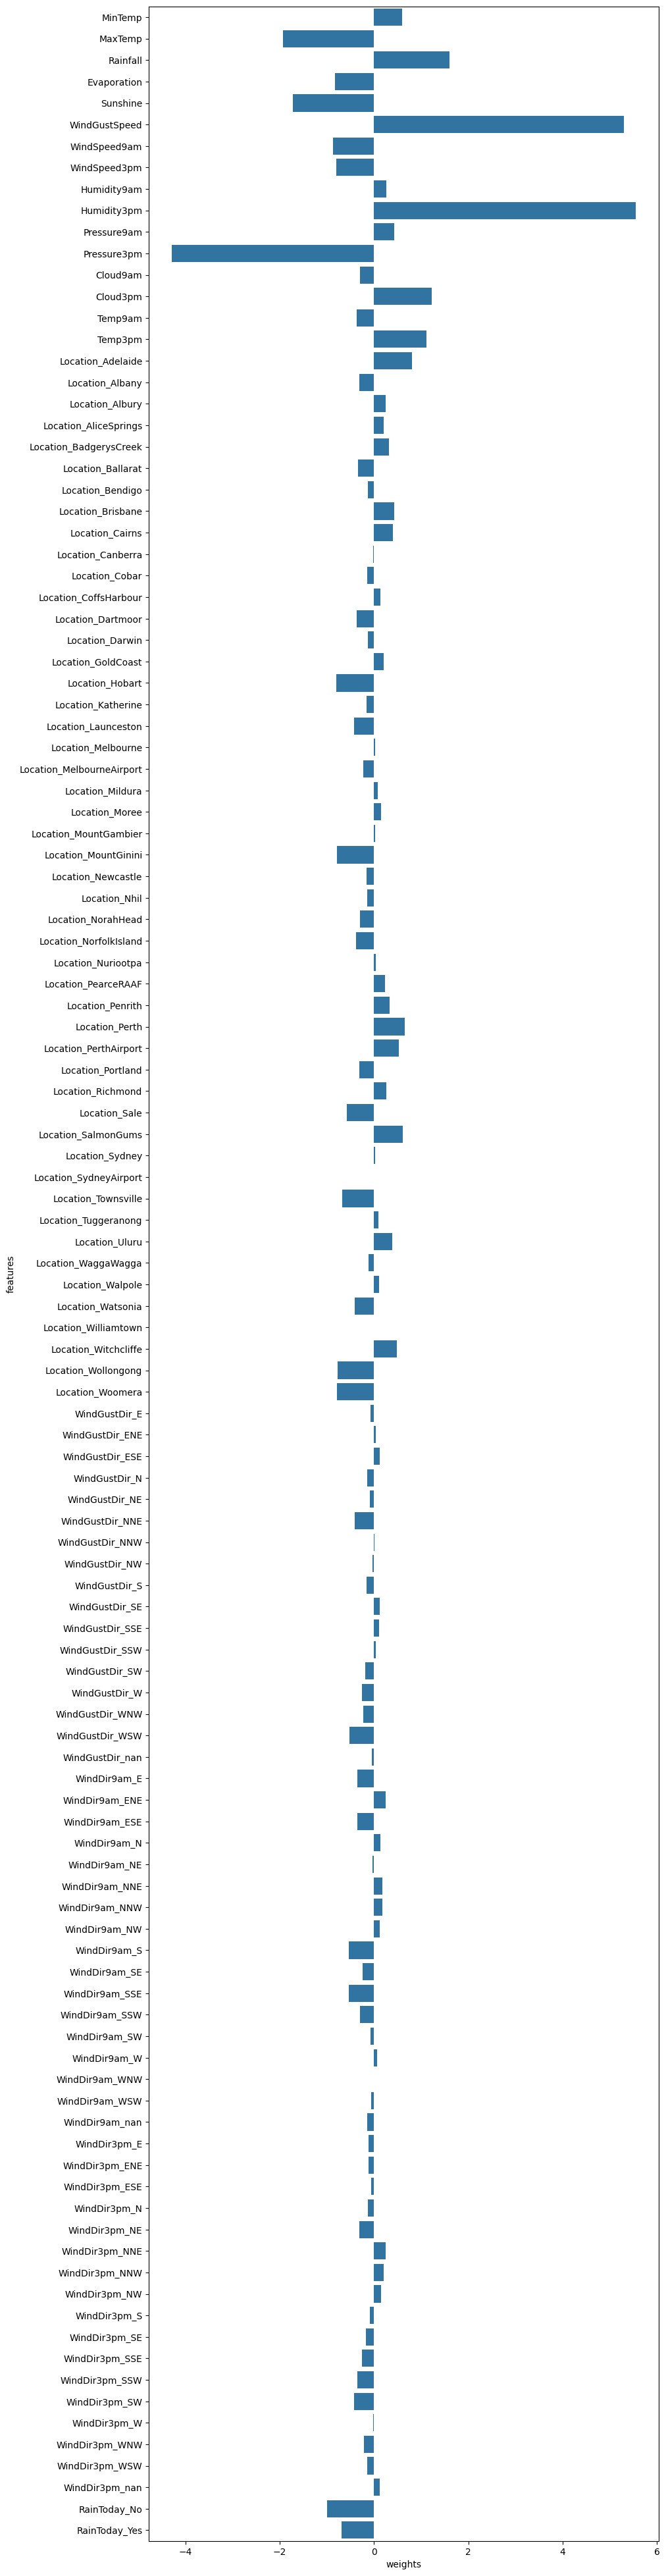

In [656]:
#lets visualize
plt.figure(figsize=(10,50))
sns.barplot(weight_df,x="weights",y="features")

<Axes: xlabel='weights', ylabel='features'>

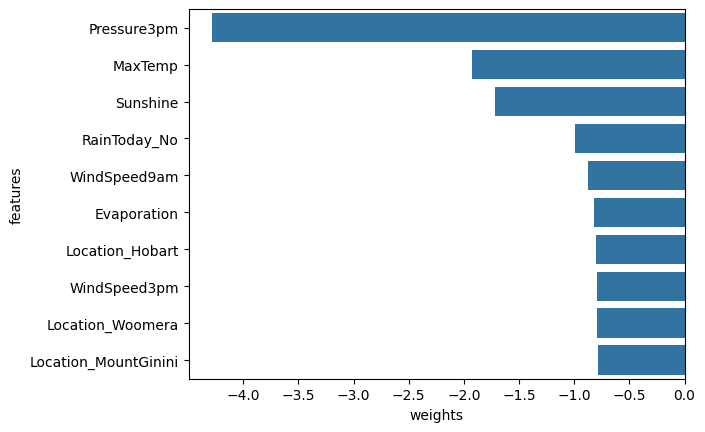

In [662]:

sns.barplot(weight_df.sort_values("weights").head(10),x="weights",y="features")

In [630]:
print(model.intercept_)

[-1.68395244]


In [632]:
#now lets make predictions and evaluate models
x_train=train_input[all_features]
x_val=validation_input[all_features]
x_test=test_input[all_features]

In [634]:
train_preds=model.predict(x_train)

In [635]:
train_preds

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [636]:
train_target

166        No
91956     Yes
91910      No
69386      No
88887      No
         ... 
124585     No
142581     No
125139     No
18299      No
69370      No
Name: RainTomorrow, Length: 9774, dtype: object

In [648]:
train_prob=model.predict_proba(x_train)

In [649]:
train_prob

array([[0.54556644, 0.45443356],
       [0.28575351, 0.71424649],
       [0.81350569, 0.18649431],
       ...,
       [0.84957591, 0.15042409],
       [0.960633  , 0.039367  ],
       [0.97170905, 0.02829095]])

In [663]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [664]:
#now lets do it using accuracy matrix
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(train_target,train_preds)

In [665]:
train_acc

0.846633926744424

In [671]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(train_target,train_preds,normalize="true") #try removing normalize...normalize is only used to make the original value 0 to 1 range
matrix

array([[0.94523461, 0.05476539],
       [0.48289649, 0.51710351]])

In [672]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 84.66%


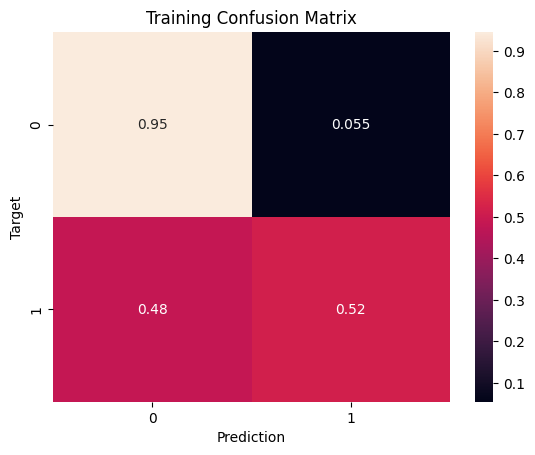

In [674]:
train_preds = predict_and_plot(x_train, train_target, 'Training')

Accuracy: 84.16%


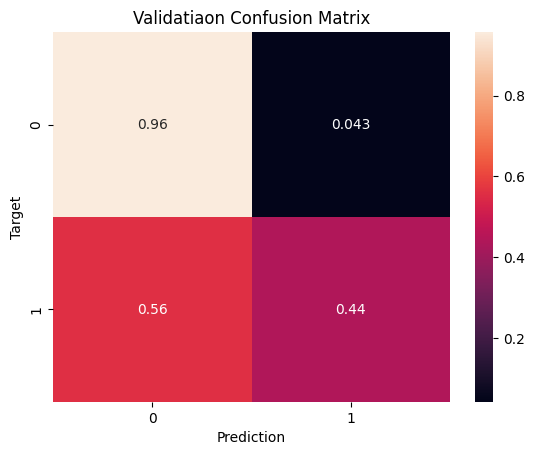

In [676]:
val_preds = predict_and_plot(x_val, validation_target, 'Validatiaon')

Accuracy: 83.77%


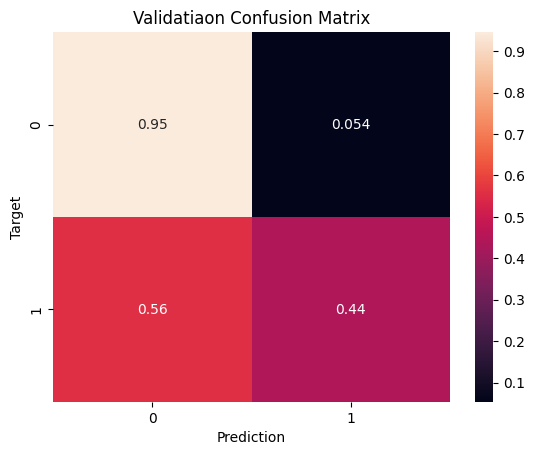

In [679]:
test_preds = predict_and_plot(x_test, test_target, 'Validatiaon')

In [680]:
#Now lets make prediction in custom data
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [681]:
#first step is to convert dictionary into a dataframe
input=pd.DataFrame([new_input])

In [682]:
input

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

We've now created a Pandas dataframe with the same columns as raw_df (except RainTomorrow, which needs to be predicted). The dataframe contains just one row of data, containing the given input.

We must now apply the same transformations applied while training the model:

    Imputation of missing values using the imputer created earlier
    Scaling numerical features using the scaler created earlier
    Encoding categorical features using the encoder created earlier



In [685]:
input[numeric_col]=impute.transform(input[numeric_col])
input[numeric_col]=scale.transform(input[numeric_col])
input[encoded_col]=encoder.transform(input[categorical_col])


<ipython-input-685-462bc10e7e3b>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-685-462bc10e7e3b>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-685-462bc10e7e3b>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-685-462bc10e7e3b>:3: PerformanceWarning:

In [694]:
all_features = numeric_col + encoded_col.tolist()
new_input=input[all_features]
new_input

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.206384  0.06149  0.000002      0.00001  0.002843      -0.062464   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0       0.00004       0.00003    -0.020524    -0.010144   -18.765216   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0    -17.75559  0.010974  0.006859  0.122954  0.087413                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0            0

In [695]:
prediction=model.predict(new_input)[0]

In [696]:
prediction

'Yes'

Our model predicts that it will rain tomorrow in Katherine! We can also check the probability of the prediction.


In [700]:
prob=model.predict_proba(new_input)[0]

In [701]:
prob

array([0., 1.])

In [705]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_col] = impute.transform(input_df[numeric_col])
    input_df[numeric_col] = scale.transform(input_df[numeric_col])
    input_df[encoded_col] = encoder.transform(input_df[categorical_col])
    all_features = numeric_col + encoded_col.tolist()
    X_input = input_df[all_features]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [706]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [707]:
predict_input(new_input)

<ipython-input-705-464bb51289da>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-705-464bb51289da>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-705-464bb51289da>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-705-464bb51289da>:5: PerformanceWarning:

('Yes', 0.6520723892916236)